# sprint23 ゲート付きリカレントニューラルネットワーク

# このSprintについて
## Sprintの目的
発展的なRNNの手法を理解する
ドキュメントを網羅的に読む
## どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。


# KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。

https://keras.io/ja/layers/recurrent/

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN
GRU
LSTM
ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。

In [1]:
import keras
import tensorflow as tf
import numpy as np

Using TensorFlow backend.
/Users/arisa/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/arisa/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/arisa/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/arisa/.local/lib/python3.7/site-packages/tensorflow/python

In [2]:
tf.__version__

'1.14.0'

In [3]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

from functools import partial

In [5]:
np.load = partial(np.load, allow_pickle=True)  # monkey patch

In [7]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 5


print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [8]:
np.load = partial(np.load, allow_pickle=False)    #設定を元に戻す

### LSTM

In [9]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Build model...



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 483s 19ms/step - loss: 0.4537 - acc: 0.7888 - val_loss: 0.3602 - val_acc: 0.8449
Epoch 2/5
25000/25000 [==============================] - 459s 18ms/step - loss: 0.2728 - acc: 0.8912 - val_loss: 0.3590 - val_acc: 0.8467
Epoch 3/5
25000/25000 [==============================] - 432s 17ms/step - loss: 0.1685 - acc: 0.9360 - val_loss: 0.5022 - val_acc: 0.8349
Epoch 4/5
25000/25000 [==============================] - 433s 17ms/step - loss: 0.0978 - acc: 0.9640 - val_loss: 0.5476 - val_acc: 0.8290
Epoch 5/5
25000/25000 [==============================] - 34s 1ms/step
Test score: 0.6437352276019025
Test accuracy: 0.8221200092852116


### Simple RNN

In [13]:
from keras.layers import SimpleRNN

In [14]:
print('Build model...')
model_RNN = Sequential()

model_RNN.add(Embedding(max_features, 128))
model_RNN.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model_RNN.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_RNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [15]:
print('Train...')
model_RNN.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model_RNN.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 169s 7ms/step - loss: 0.6667 - acc: 0.5781 - val_loss: 0.5919 - val_acc: 0.6696
Epoch 2/5
25000/25000 [==============================] - 172s 7ms/step - loss: 0.5616 - acc: 0.7069 - val_loss: 0.5973 - val_acc: 0.6746
Epoch 3/5
25000/25000 [==============================] - 173s 7ms/step - loss: 0.5073 - acc: 0.7492 - val_loss: 0.5229 - val_acc: 0.7594
Epoch 4/5
25000/25000 [==============================] - 168s 7ms/step - loss: 0.4614 - acc: 0.7830 - val_loss: 0.6484 - val_acc: 0.6387
Epoch 5/5
25000/25000 [==============================] - 15s 580us/step
Test score: 0.6155432399250567
Test accuracy: 0.6862400127589703


### GRU

In [16]:
from keras.layers import GRU

In [17]:
print('Build model...')
model_GRU = Sequential()

model_GRU.add(Embedding(max_features, 128))
model_GRU.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model_GRU.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model_GRU.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [18]:
print('Train...')
model_GRU.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model_GRU.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 408s 16ms/step - loss: 0.4426 - acc: 0.7900 - val_loss: 0.3364 - val_acc: 0.8526
Epoch 2/5
25000/25000 [==============================] - 411s 16ms/step - loss: 0.2378 - acc: 0.9043 - val_loss: 0.3522 - val_acc: 0.8492
Epoch 3/5
25000/25000 [==============================] - 394s 16ms/step - loss: 0.1293 - acc: 0.9517 - val_loss: 0.4259 - val_acc: 0.8387
Epoch 4/5
25000/25000 [==============================] - 409s 16ms/step - loss: 0.0613 - acc: 0.9791 - val_loss: 0.6160 - val_acc: 0.8319
Epoch 5/5
25000/25000 [==============================] - 29s 1ms/step
Test score: 0.7557781514497215
Test accuracy: 0.8301200089007617


### ConvLSTM2D

In [19]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')




Train on 950 samples, validate on 50 samples
Epoch 1/5
950/950 [==============================] - 746s 785ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 2/5
950/950 [==============================] - 729s 768ms/step - loss: 7.8055e-04 - val_loss: 7.4741e-04
Epoch 3/5
950/950 [==============================] - 737s 776ms/step - loss: 5.7471e-04 - val_loss: 5.6545e-04
Epoch 4/5
950/950 [==============================] - 730s 769ms/step - loss: 4.7151e-04 - val_loss: 4.8542e-04
Epoch 5/5
950/950 [==============================] - 793s 835ms/step - loss: 4.1341e-04 - val_loss: 6.6402e-04


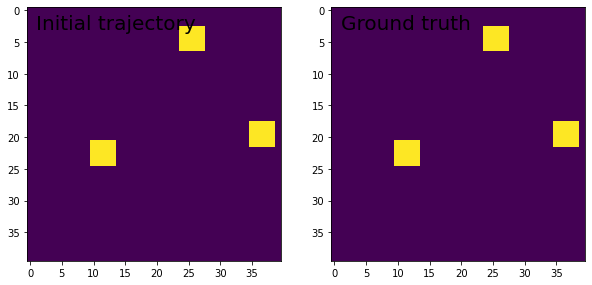

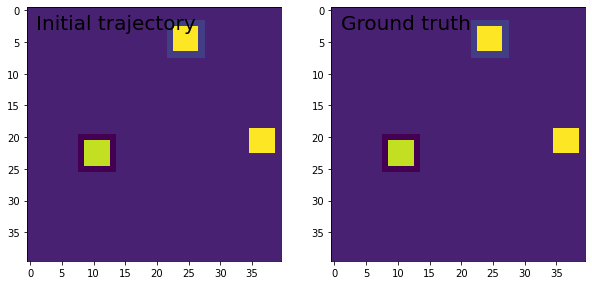

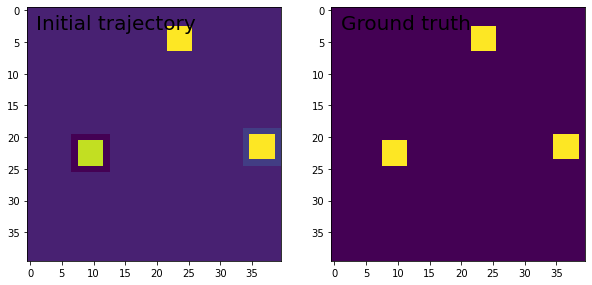

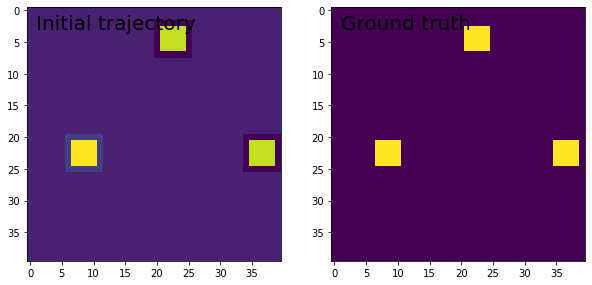

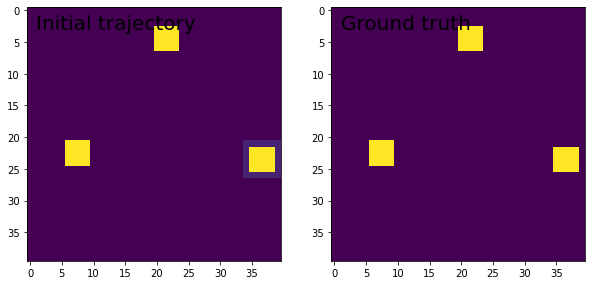

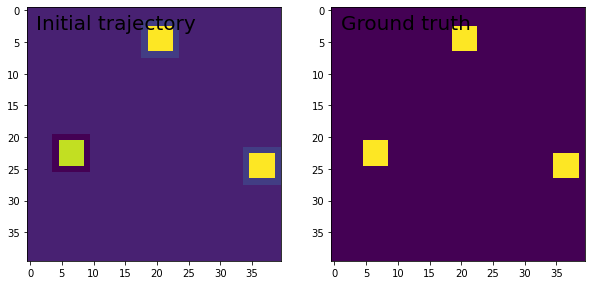

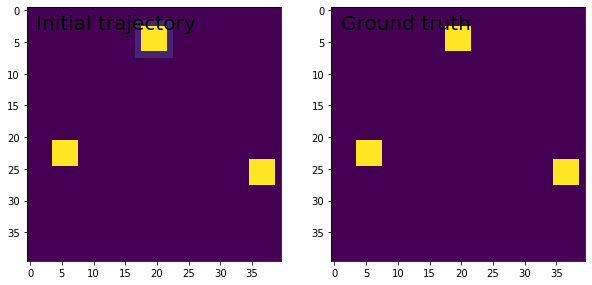

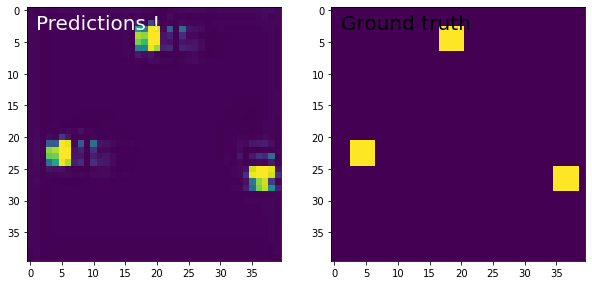

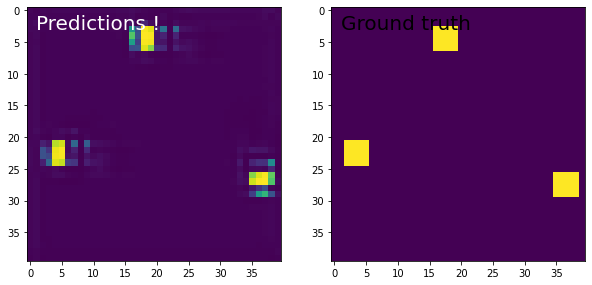

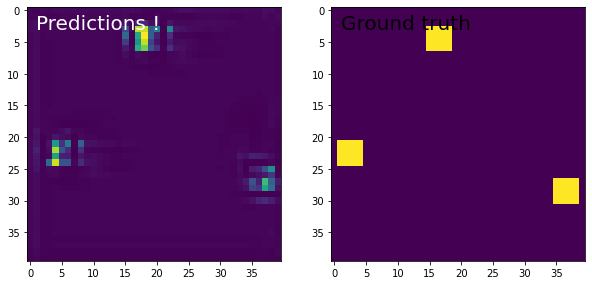

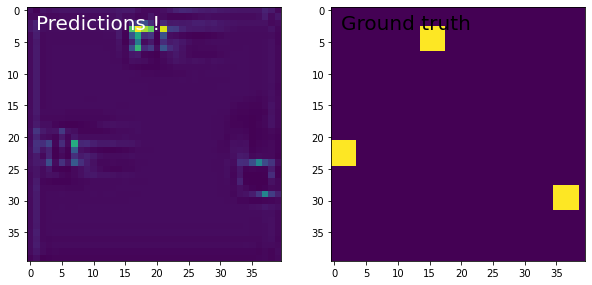

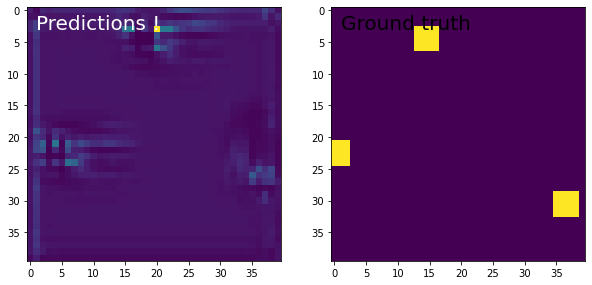

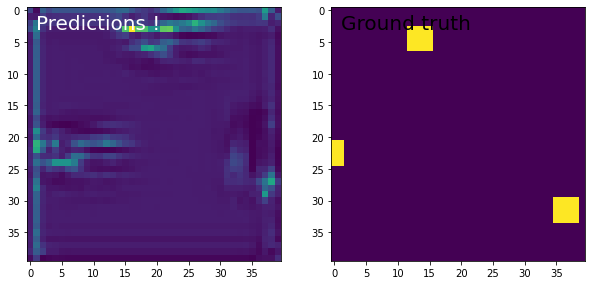

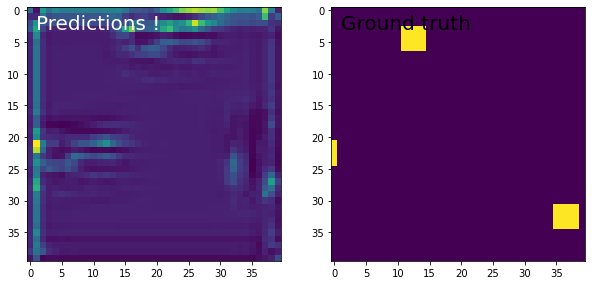

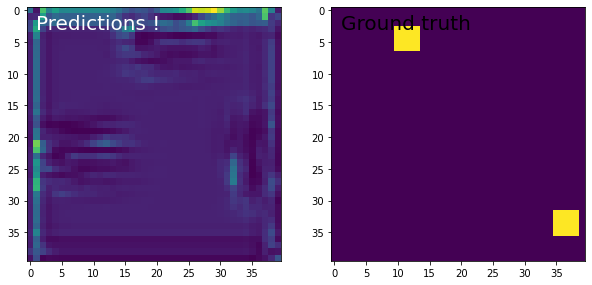

In [22]:
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

【考察】SimpleRNNの精度が一番低かった。GRUはLSTMより処理が早いにもかかわらず、精度は高かった。GRUは記憶セルを持たないため処理が早く、タスクによってはLSTMより精度が上がるそうだ。
ConvLSTM2Dは学習が少なかったため、予測はイマイチではあったが、下記サイトで結果をみることができた。
RNNなど時系列データを扱うモデルで、MNISTの下半分の画像を予測するなど、画像の予測を行えることを学んだ
https://omedstu.jimdofree.com/2018/06/29/keras%E3%81%AEconvlstm%E3%81%AE%E5%AE%9F%E8%A3%85%E3%82%92%E8%A6%8B%E3%82%8B/

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。
- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

- RNN
> Recurrent layersのスーパークラス

- SimpleRNNCell
> SimpleRNN層に対応するCellクラス。セルは単一の時間ステップだけを処理する
> RNN(LSTMCell(10)) = LSTM (10)

- GRUCell
> GRU層に対応するCellクラス。セルは単一の時間ステップだけを処理する

- LSTMCell
> LSTM層に対応するCellクラス。セルは単一の時間ステップだけを処理する

- StackedRNNCells
>RNNセルのスタックが単一のセルとして動作できるようにするラッパー
> rnn_cells = [tf.keras.layers.LSTMCell(128) for _ in range(2)]
> stacked_lstm = tf.keras.layers.StackedRNNCells(rnn_cells)
> lstm_layer = tf.keras.layers.RNN(stacked_lstm)

- CuDNNGRU
> NVIDIACUDA®ディープニューラルネットワークライブラリのCuDNNを利用した高速なGRU（LSTMの記憶セルの無い版）実装

- CuDNNLSTM
> NVIDIACUDA®ディープニューラルネットワークライブラリのCuDNNを利用した高速なLSTM実装

- Cell
> セルは横方向（時間）は同じものを使う、縦方向（層）は別で設定

### LSTMスクラッチ（コピー）で理解を深める
持っている本のLSTMスクラッチを動かしてみる

In [24]:
with open("kaijin20.txt", mode="r", encoding="utf-8") as f:  # ファイルの読み込み
    text = f.read()
print(text)

そのころ、東京中の町という町、家という家では、ふたり以上の人が顔をあわせさえすれば、まるでお天気のあいさつでもするように、怪人二十面相のうわさをしていました。
二十面相というのは、毎日毎日、新聞記事をにぎわしている、ふしぎな盗賊のあだ名です。その賊は二十のまったくちがった顔を持っているといわれていました。つまり、変装がとびきりじょうずなのです。
どんなに明るい場所で、どんなに近よってながめても、少しも変装とはわからない、まるでちがった人に見えるのだそうです。老人にも若者にも、富豪にも乞食にも、学者にも無頼漢にも、いや、女にさえも、まったくその人になりきってしまうことができるといいます。
では、その賊のほんとうの年はいくつで、どんな顔をしているのかというと、それは、だれひとり見たことがありません。二十種もの顔を持っているけれど、そのうちの、どれがほんとうの顔なのだか、だれも知らない。いや、賊自身でも、ほんとうの顔をわすれてしまっているのかもしれません。それほど、たえずちがった顔、ちがった姿で、人の前にあらわれるのです。
そういう変装の天才みたいな賊だものですから、警察でもこまってしまいました。いったい、どの顔を目あてに捜索したらいいのか、まるで見当がつかないからです。
ただ、せめてものしあわせは、この盗賊は、宝石だとか、美術品だとか、美しくてめずらしくて、ひじょうに高価な品物をぬすむばかりで、現金にはあまり興味を持たないようですし、それに、人を傷つけたり殺したりする、ざんこくなふるまいは、一度もしたことがありません。血がきらいなのです。
しかし、いくら血がきらいだからといって、悪いことをするやつのことですから、自分の身があぶないとなれば、それをのがれるためには、何をするかわかったものではありません。東京中の人が二十面相のうわさばかりしているというのも、じつは、こわくてしかたがないからです。
ことに、日本にいくつという貴重な品物を持っている富豪などは、ふるえあがってこわがっていました。今までのようすで見ますと、いくら警察へたのんでも、ふせぎようのない、おそろしい賊なのですから。
この二十面相には、一つのみょうなくせがありました。何かこれという貴重な品物をねらいますと、かならず前もって、いついく日にはそれをちょうだいに参上するという、予告状を送ることです。賊ながらも、不公

文字数: 109079
文字数（重複無し）: 1247
Epoch: 1/5  852/852  Error: 33.39394552883179
Seed: そのころ、東京中の町という町、家という家
そのころ、東京中の町という町、家という家のです。
そがいました。
そに、そのはいとうんいた。
ハのしっているです。
そのです。
そのラと、そののにしているのです。
そのです。
そのです。
その壮です。
そのは、こののとのしたのです。
そのです。
そのありたのでです。
そのそのでなす。
そうが、そのですは、きしているがいません。あが、いのといるのです。
じのと、いのおのです。
くのではいたう。
れえした。
か、あ、その十もをは、そののじう

Epoch: 2/5  852/852  Error: 29.748493151784
Seed: そのころ、東京中の町という町、家という家
そのころ、東京中の町という町、家という家のです。

あ、こ人のです。
その、そのそうに、こをなって、一のほの老ようなこと、こんなから、そんない。
それ、それたのです。
それて、ちんのふうと、それゃ、つんなりません。
ぼした。
さん、そのつが、それなが、それないのです。
あ、いんと、動のうが、きものです。
それ、おことかなってあるのです。
あ、あって、だれのです。
それ、それに、ぼんのだ。
おと、老のはありました。

わえ、それと、二十面

Epoch: 3/5  852/852  Error: 28.989100595533863
Seed: そのころ、東京中の町という町、家という家
そのころ、東京中の町という町、家という家のほんでした。
あると、このです。
そこと、何をひとりにして、一柴ッとうにはきません。
ああるんだ。
それ、そんに、ぼくにおわして、返んだんだんないました。
それては、こしを警ちたのです。
ふたちが、そんだようにもいっとしたまで、そのこをとりにしているのでする。
し、それが、その部をとりませんで、そのことをしたりではありません。
まわしょうところを、賊のむことをしているのでする。
そうは、その前を

Epoch: 4/5  852/852  Error: 27.77498860860453
Seed: そのころ、東京中の町という町、家という家
そのころ、東京中の町という町、

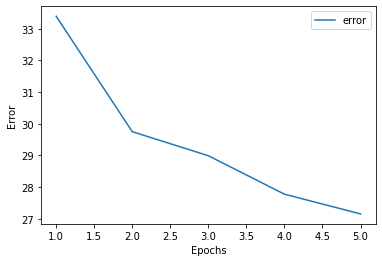

In [23]:
import numpy as np
# import cupy as np  # GPUの場合
import matplotlib.pyplot as plt

# -- 各設定値 --
n_time = 20  # 時系列の数
n_mid = 128  # 中間層のニューロン数

eta = 0.01  # 学習係数
clip_const = 0.02  # ノルムの最大値を決める定数
beta = 2  # 確率分布の狭さ（次の文字の確定時に使用）
epoch = 5
batch_size = 128

def sigmoid(x):
    return 1/(1+np.exp(-x))

def clip_grad(grads, max_norm):
    norm = np.sqrt(np.sum(grads*grads))
    r = max_norm / norm
    if r < 1:
        clipped_grads = grads * r
    else:
        clipped_grads = grads
    return clipped_grads

# -- 訓練用の文章 --
with open("kaijin20.txt", mode="r", encoding="utf-8") as f:  # ファイルの読み込み
    text = f.read()
print("文字数:", len(text))  # len() で文字列の文字数も取得可能

# -- 文字とインデックスの関連付け --
chars_list = sorted(list(set(text)))  # setで文字の重複をなくす
n_chars = len(chars_list)
print("文字数（重複無し）:", n_chars)

char_to_index = {}  # 文字がキーでインデックスが値の辞書
index_to_char = {}  # インデックスがキーで文字が値の辞書
for i, char in enumerate(chars_list):
    char_to_index[char] = i
    index_to_char[i] = char
 
# -- 時系列に並んだ文字と、その次の文字 --
seq_chars = []
next_chars = []
for i in range(0, len(text) - n_time):
    seq_chars.append(text[i: i + n_time])
    next_chars.append(text[i + n_time])

# -- 入力と正解のone-hot表現 --
input_data = np.zeros((len(seq_chars), n_time, n_chars), dtype=np.bool)
correct_data = np.zeros((len(seq_chars), n_chars), dtype=np.bool)
for i, chars in enumerate(seq_chars):
    correct_data[i, char_to_index[next_chars[i]]] = 1  # 正解をone-hot表現で表す
    for j, char in enumerate(chars):
        input_data[i, j, char_to_index[char]] = 1  # 入力をone-hot表現で表す      

# -- LSTM層 -- 
class LSTMLayer:
    def __init__(self, n_upper, n):
        # 各パラメータの初期値
        self.w = np.random.randn(4, n_upper, n) / np.sqrt(n_upper)  # Xavierの初期値
        self.v = np.random.randn(4, n, n) / np.sqrt(n)
        self.b = np.zeros((4, n))

    def forward(self, x, y_prev, c_prev):  # y_prev, c_prev: 前の時刻の出力と記憶セル
        u = np.matmul(x, self.w) + np.matmul(y_prev, self.v) + self.b.reshape(4, 1, -1)

        a0 = sigmoid(u[0])  # 忘却ゲート
        a1 = sigmoid(u[1])  # 入力ゲート
        a2 = np.tanh(u[2])  # 新しい記憶
        a3 = sigmoid(u[3])  # 出力ゲート
        self.gates = np.stack((a0, a1, a2, a3))

        self.c = a0*c_prev + a1*a2  # 記憶セル
        self.y = a3 * np.tanh(self.c)  # 出力
    
    def backward(self, x, y, c, y_prev, c_prev, gates, grad_y, grad_c, ):   
        a0, a1, a2, a3 = gates
        tanh_c = np.tanh(c)
        r = grad_c + (grad_y*a3) * (1-tanh_c**2)

        # 各delta
        delta_a0 = r * c_prev * a0 * (1-a0)
        delta_a1 = r * a2 * a1 * (1-a1)
        delta_a2 = r * a1 * (1 - a2**2)
        delta_a3 = grad_y * tanh_c * a3 * (1 - a3)

        deltas = np.stack((delta_a0, delta_a1, delta_a2, delta_a3))

        # 各パラメータの勾配
        self.grad_w += np.matmul(x.T, deltas)
        self.grad_v += np.matmul(y_prev.T, deltas)
        self.grad_b += np.sum(deltas, axis=1)

        # xの勾配
        grad_x = np.matmul(deltas, self.w.transpose(0, 2, 1))
        self.grad_x = np.sum(grad_x, axis=0)

        # y_prevの勾配
        grad_y_prev = np.matmul(deltas, self.v.transpose(0, 2, 1))
        self.grad_y_prev = np.sum(grad_y_prev, axis=0)
        
        # c_prevの勾配
        self.grad_c_prev = r * a0

    def reset_sum_grad(self):
        self.grad_w = np.zeros_like(self.w)
        self.grad_v = np.zeros_like(self.v)
        self.grad_b = np.zeros_like(self.b)

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.v -= eta * self.grad_v
        self.b -= eta * self.grad_b

    def clip_grads(self, clip_const):
        self.grad_w = clip_grad(self.grad_w, clip_const*np.sqrt(self.grad_w.size))
        self.grad_v = clip_grad(self.grad_v, clip_const*np.sqrt(self.grad_v.size))

# -- 全結合 出力層 --
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = np.random.randn(n_upper, n) / np.sqrt(n_upper)  # Xavierの初期値
        self.b = np.zeros(n)

    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1).reshape(-1, 1)  # ソフトマックス関数

    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 各層の初期化 --
lstm_layer = LSTMLayer(n_chars, n_mid)
output_layer = OutputLayer(n_mid, n_chars)

# -- 訓練 --
def train(x_mb, t_mb):
    # 順伝播 LSTM層
    y_rnn = np.zeros((len(x_mb), n_time+1, n_mid))
    c_rnn = np.zeros((len(x_mb), n_time+1, n_mid))
    gates_rnn = np.zeros((4, len(x_mb), n_time, n_mid))
    y_prev = y_rnn[:, 0, :]
    c_prev = c_rnn[:, 0, :]
    for i in range(n_time):
        x = x_mb[:, i, :]
        lstm_layer.forward(x, y_prev, c_prev)

        y = lstm_layer.y
        y_rnn[:, i+1, :] = y
        y_prev = y

        c = lstm_layer.c
        c_rnn[:, i+1, :] = c
        c_prev = c

        gates = lstm_layer.gates
        gates_rnn[:, :, i, :] = gates

    # 順伝播 出力層
    output_layer.forward(y)

    # 逆伝播 出力層
    output_layer.backward(t_mb)
    grad_y = output_layer.grad_x
    grad_c = np.zeros_like(lstm_layer.c)

    # 逆伝播 LSTM層
    lstm_layer.reset_sum_grad()
    for i in reversed(range(n_time)):
        x = x_mb[:, i, :]
        y = y_rnn[:, i+1, :]
        c = c_rnn[:, i+1, :]
        y_prev = y_rnn[:, i, :]
        c_prev = c_rnn[:, i, :]
        gates = gates_rnn[:, :, i, :] 

        lstm_layer.backward(x, y, c, y_prev, c_prev, gates, grad_y, grad_c)
        grad_y = lstm_layer.grad_y_prev
        grad_c = lstm_layer.grad_c_prev

    # パラメータの更新
    lstm_layer.clip_grads(clip_const)
    lstm_layer.update(eta)
    output_layer.update(eta)

# -- 予測 --
def predict(x_mb):
    # 順伝播 LSTM層
    y_prev = np.zeros((len(x_mb), n_mid))
    c_prev = np.zeros((len(x_mb), n_mid))
    for i in range(n_time):
        x = x_mb[:, i, :]
        lstm_layer.forward(x, y_prev, c_prev)
        y = lstm_layer.y
        y_prev = y
        c = lstm_layer.c
        c_prev = c

    # 順伝播 出力層
    output_layer.forward(y)
    return output_layer.y

# -- 誤差を計算 --
def get_error(x, t):
    limit = 1000
    if len(x) > limit:  # 測定サンプル数の上限を設定
        index_random = np.arange(len(x))
        np.random.shuffle(index_random)
        x = x[index_random[:limit], :]
        t = t[index_random[:limit], :]
    y = predict(x)
    return -np.sum(t*np.log(y+1e-7))/batch_size  # 交差エントロピー誤差

def create_text():
    prev_text = text[0:n_time]  # 入力
    created_text = prev_text  # 生成されるテキスト
    print("Seed:", created_text)

    for i in range(200):  # 200文字の文章を生成
        # 入力をone-hot表現に
        x = np.zeros((1, n_time, n_chars))
        for j, char in enumerate(prev_text):
            x[0, j, char_to_index[char]] = 1
        
        # 予測を行い、次の文字を得る
        y = predict(x)
        p = y[0] ** beta  # 確率分布の調整
        p = p / np.sum(p)  # pの合計を1に
        next_index = np.random.choice(len(p), size=1, p=p)
        next_char = index_to_char[int(next_index[0])]
        created_text += next_char
        prev_text = prev_text[1:] + next_char

    print(created_text)
    print()  # 改行

error_record = []
n_batch = len(input_data) // batch_size  # 1エポックあたりのバッチ数
for i in range(epoch):
        
    # -- 学習 -- 
    index_random = np.arange(len(input_data))
    np.random.shuffle(index_random)  # インデックスをシャッフルする
    for j in range(n_batch):
        
        # ミニバッチを取り出す
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x_mb = input_data[mb_index, :]
        t_mb = correct_data[mb_index, :]
        train(x_mb, t_mb)

        # -- 経過の表示 -- 
        print("\rEpoch: "+str(i+1)+"/"+str(epoch)+"  "+str(j+1)+"/"+str(n_batch), end="")

    # -- 誤差を求める --
    error = get_error(input_data, correct_data)
    error_record.append(error)
    print("  Error: "+str(error))

    # -- 経過の表示 -- 
    create_text()

plt.plot(range(1, len(error_record)+1), error_record, label="error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

### シンプルなLSTM

Epoch:1/101 Error:3.0705046697108305


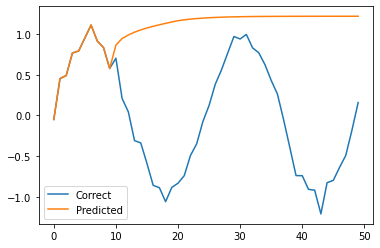

Epoch:11/101 Error:1.0171825714841343


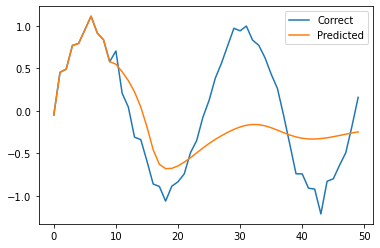

Epoch:21/101 Error:0.4757350230429562


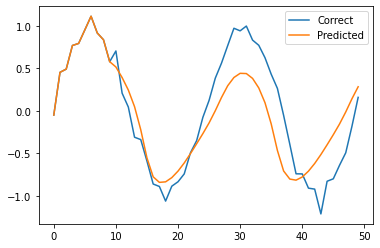

Epoch:31/101 Error:0.32594665181216553


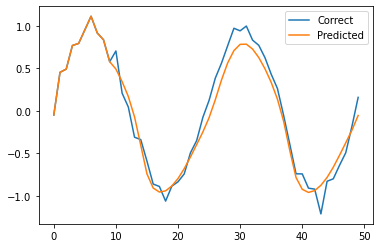

Epoch:41/101 Error:0.2801512717511807


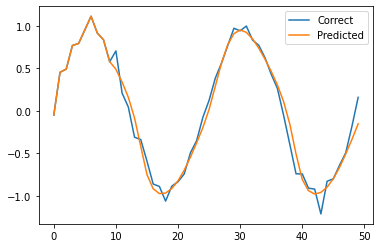

Epoch:51/101 Error:0.2608619129189994


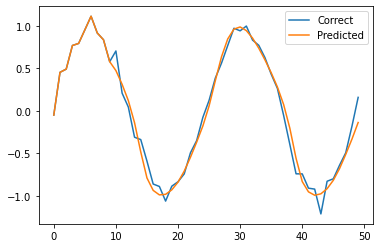

Epoch:61/101 Error:0.2509597217383024


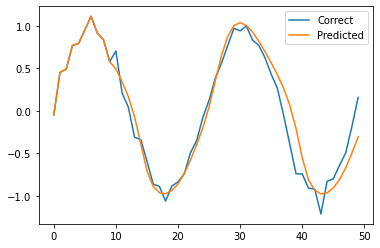

Epoch:71/101 Error:0.24132299394799467


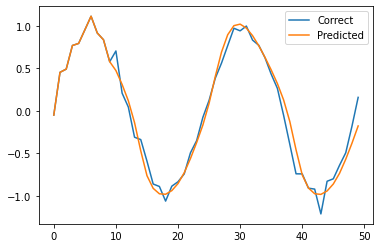

Epoch:81/101 Error:0.23569723137699788


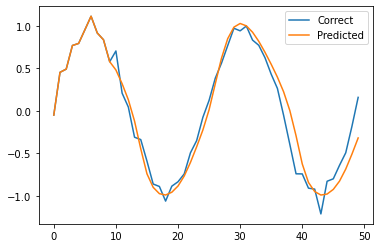

Epoch:91/101 Error:0.23027333558540491


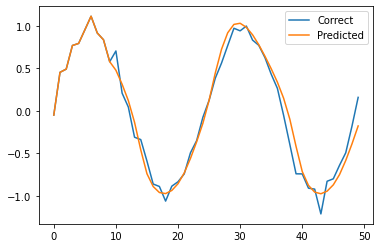

Epoch:101/101 Error:0.22556155987464266


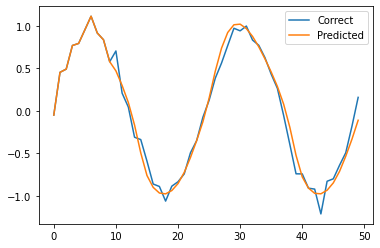

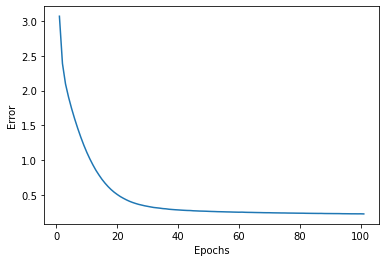

In [25]:
# -- 各設定値 --
n_time = 10  # 時系列の数
n_in = 1  # 入力層のニューロン数
n_mid = 20  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

eta = 0.01  # 学習係数
epochs = 101
batch_size = 8
interval = 10  # 経過の表示間隔

def sigmoid(x):
    return 1/(1+np.exp(-x))

# -- 訓練データの作成 --
sin_x = np.linspace(-2*np.pi, 2*np.pi)  # -2πから2πまで
sin_y = np.sin(sin_x)  + 0.1*np.random.randn(len(sin_x))  # sin関数に乱数でノイズを加える
n_sample = len(sin_x)-n_time  # サンプル数
input_data = np.zeros((n_sample, n_time, n_in))  # 入力
correct_data = np.zeros((n_sample, n_out))  # 正解
for i in range(0, n_sample):
    input_data[i] = sin_y[i:i+n_time].reshape(-1, 1)
    correct_data[i] = sin_y[i+n_time:i+n_time+1]  # 正解は入力よりも一つ後

# -- LSTM層 -- 
class LSTMLayer:
    def __init__(self, n_upper, n):
        # 各パラメータの初期値
        self.w = np.random.randn(4, n_upper, n) / np.sqrt(n_upper)  # Xavierの初期値
        self.v = np.random.randn(4, n, n) / np.sqrt(n)
        self.b = np.zeros((4, n))

    def forward(self, x, y_prev, c_prev):  # y_prev, c_prev: 前の時刻の出力と記憶セル
        u = np.matmul(x, self.w) + np.matmul(y_prev, self.v) + self.b.reshape(4, 1, -1)

        a0 = sigmoid(u[0])  # 忘却ゲート
        a1 = sigmoid(u[1])  # 入力ゲート
        a2 = np.tanh(u[2])  # 新しい記憶
        a3 = sigmoid(u[3])  # 出力ゲート
        self.gates = np.stack((a0, a1, a2, a3))

        self.c = a0*c_prev + a1*a2  # 記憶セル
        self.y = a3 * np.tanh(self.c)  # 出力
    
    def backward(self, x, y, c, y_prev, c_prev, gates, grad_y, grad_c):   
        a0, a1, a2, a3 = gates
        tanh_c = np.tanh(c)
        r = grad_c + (grad_y*a3) * (1-tanh_c**2)

        # 各delta
        delta_a0 = r * c_prev * a0 * (1-a0)
        delta_a1 = r * a2 * a1 * (1-a1)
        delta_a2 = r * a1 * (1 - a2**2)
        delta_a3 = grad_y * tanh_c * a3 * (1 - a3)

        deltas = np.stack((delta_a0, delta_a1, delta_a2, delta_a3))

        # 各パラメータの勾配
        self.grad_w += np.matmul(x.T, deltas)
        self.grad_v += np.matmul(y_prev.T, deltas)
        self.grad_b += np.sum(deltas, axis=1)

        # xの勾配
        grad_x = np.matmul(deltas, self.w.transpose(0, 2, 1))
        self.grad_x = np.sum(grad_x, axis=0)

        # y_prevの勾配
        grad_y_prev = np.matmul(deltas, self.v.transpose(0, 2, 1))
        self.grad_y_prev = np.sum(grad_y_prev, axis=0)
        
        # c_prevの勾配
        self.grad_c_prev = r * a0

    def reset_sum_grad(self):
        self.grad_w = np.zeros_like(self.w)
        self.grad_v = np.zeros_like(self.v)
        self.grad_b = np.zeros_like(self.b)

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.v -= eta * self.grad_v
        self.b -= eta * self.grad_b

# -- 全結合 出力層 --
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = np.random.randn(n_upper, n) / np.sqrt(n_upper)  # Xavierの初期値
        self.b = np.zeros(n)

    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u  # 恒等関数

    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 各層の初期化 --
lstm_layer = LSTMLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 訓練 --
def train(x_mb, t_mb):
    # 順伝播 LSTM層
    y_rnn = np.zeros((len(x_mb), n_time+1, n_mid))
    c_rnn = np.zeros((len(x_mb), n_time+1, n_mid))
    gates_rnn = np.zeros((4, len(x_mb), n_time, n_mid))
    y_prev = y_rnn[:, 0, :]
    c_prev = c_rnn[:, 0, :]
    for i in range(n_time):
        x = x_mb[:, i, :]
        lstm_layer.forward(x, y_prev, c_prev)

        y = lstm_layer.y
        y_rnn[:, i+1, :] = y
        y_prev = y

        c = lstm_layer.c
        c_rnn[:, i+1, :] = c
        c_prev = c

        gates = lstm_layer.gates
        gates_rnn[:, :, i, :] = gates

    # 順伝播 出力層
    output_layer.forward(y)

    # 逆伝播 出力層
    output_layer.backward(t_mb)
    grad_y = output_layer.grad_x
    grad_c = np.zeros_like(lstm_layer.c)

    # 逆伝播 LSTM層
    lstm_layer.reset_sum_grad()
    for i in reversed(range(n_time)):
        x = x_mb[:, i, :]
        y = y_rnn[:, i+1, :]
        c = c_rnn[:, i+1, :]
        y_prev = y_rnn[:, i, :]
        c_prev = c_rnn[:, i, :]
        gates = gates_rnn[:, :, i, :] 

        lstm_layer.backward(x, y, c, y_prev, c_prev, gates, grad_y, grad_c)
        grad_y = lstm_layer.grad_y_prev
        grad_c = lstm_layer.grad_c_prev

    # パラメータの更新
    lstm_layer.update(eta)
    output_layer.update(eta)

# -- 予測 --
def predict(x_mb):
    # 順伝播 LSTM層
    y_prev = np.zeros((len(x_mb), n_mid))
    c_prev = np.zeros((len(x_mb), n_mid))
    for i in range(n_time):
        x = x_mb[:, i, :]
        lstm_layer.forward(x, y_prev, c_prev)
        y = lstm_layer.y
        y_prev = y
        c = lstm_layer.c
        c_prev = c

    # 順伝播 出力層
    output_layer.forward(y)
    return output_layer.y

# -- 誤差を計算 --
def get_error(x, t):
    y = predict(x)
    return 1.0/2.0*np.sum(np.square(y - t))  # 二乗和誤差

error_record = []
n_batch = len(input_data) // batch_size  # 1エポックあたりのバッチ数
for i in range(epochs):
        
    # -- 学習 -- 
    index_random = np.arange(len(input_data))
    np.random.shuffle(index_random)  # インデックスをシャッフルする
    for j in range(n_batch):
        
        # ミニバッチを取り出す
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x_mb = input_data[mb_index, :]
        t_mb = correct_data[mb_index, :]
        train(x_mb, t_mb)

    # -- 誤差を求める --
    error = get_error(input_data, correct_data)
    error_record.append(error)

    # -- 経過の表示 -- 
    if i%interval == 0:
        print("Epoch:"+str(i+1)+"/"+str(epochs), "Error:"+str(error))

        predicted = input_data[0].reshape(-1).tolist() # 最初の入力
        for i in range(n_sample):
            x = np.array(predicted[-n_time:]).reshape(1, n_time, 1)
            y = predict(x)
            predicted.append(float(y[0, 0]))  # 出力をpredictedに追加する

        plt.plot(range(len(sin_y)), sin_y.tolist(), label="Correct")
        plt.plot(range(len(predicted)), predicted, label="Predicted")
        plt.legend()
        plt.show()

plt.plot(range(1, len(error_record)+1), error_record)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()